# Classificando filmes por idioma

## 1. Introdução
Neste notebook, realizaremos uma análise de dados sobre filmes, focando nos idiomas dos filmes presentes na base de dados. 
A base contém mais de 5000 filmes e informações sobre suas avaliações. Vamos explorar como os filmes estão distribuídos entre diferentes idiomas e fazer uma análise visual de como a frequência dos idiomas se distribui na amostra.


## 2. Importação de bibliotecas


In [ ]:
import pandas as pd

In [31]:
!pip install seaborn

In [32]:
import seaborn as sns

### Carregando o conjunto de dados


In [43]:
tmdb = pd.read_csv("data/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## 3. Exploração inicial dos dados


### Verificando os idiomas únicos

In [82]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Contando a frequência de cada idioma

In [45]:
tmdb.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

## 4. Preparação dos dados

### Criando o DataFrame com a contagem de filmes por idioma


In [ ]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]

contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


## 5. Visualização da distribuição dos idiomas


### Gráfico de barras


<Axes: xlabel='original_language', ylabel='total'>

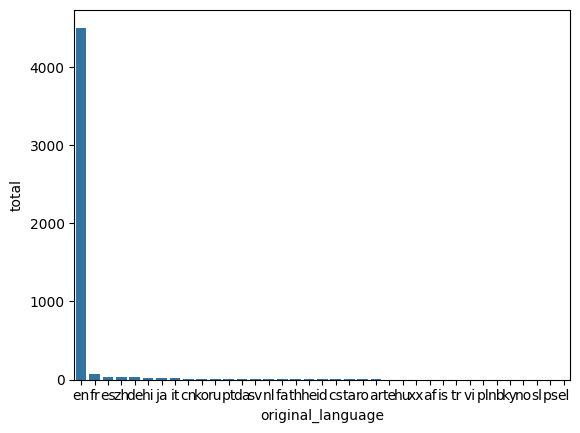

In [53]:
sns.barplot(x="original_language", y="total",data = contagem_de_lingua)

### Gráfico de pizza


([<matplotlib.patches.Wedge at 0x2e338eed7f0>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'en'),
  Text(1.0355355060813987, -0.371033981792425, 'fr'),
  Text(1.0579676532751783, -0.30117178590202043, 'es'),
  Text(1.0687996896821872, -0.2601292435218708, 'zh'),
  Text(1.0773192231958597, -0.22222351660584796, 'de'),
  Text(1.0835168605253713, -0.18971350230609152, 'hi'),
  Text(1.0875755883723952, -0.16486157701671572, 'ja'),
  Text(1.0906010458121063, -0.14348992603503677, 'it'),
  Text(1.092883468191142, -0.12492287602557497, 'cn'),
  Text(1.094639090663068, -0.10846778873163951, 'ko'),
  Text(1.0960865548595407, -0.0927052547385707, 'ru'),
  Text(1.097205502470541, -0.078358696699014, 'pt'),
  Text(1.0979654406138135, -0.06687220063460171, 'da'),
  Text(1.0984565068410161, -0.05825206072434674, 'sv'),
  Text(1.0987803772611597, -0.05178496447641595, 'nl'),
  Text(1.0990363134163792, -0.04603457170578121, 'fa'),
  Text(1.0992355467780295, -0.041002593815593756, 'th'),
  Text(1.

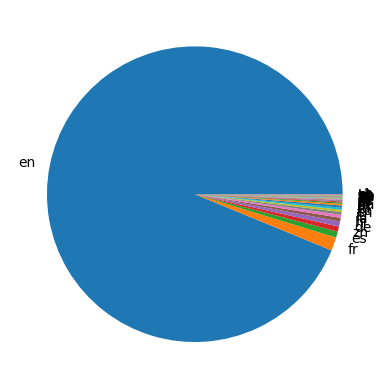

In [55]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

## 6. Classificando filmes por idioma: inglês e outros

In [78]:
total_por_lingua = tmdb["original_language"].value_counts()
total_de_ingles = total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_do_resto =  total_geral - total_de_ingles

dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}


### Gráfico de barras

<Axes: xlabel='lingua', ylabel='total'>

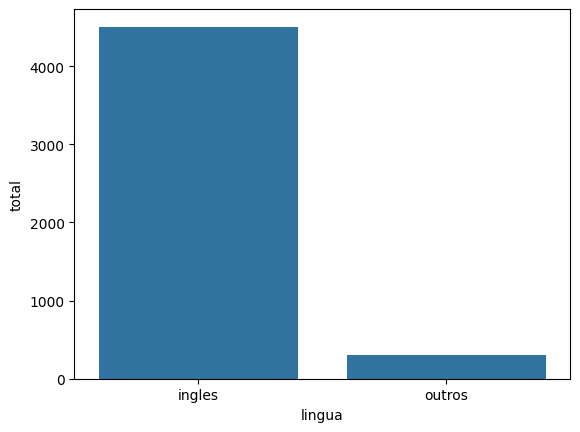

In [79]:
sns.barplot(x="lingua", y="total", data = dados)


### Gráfico de pizza

([<matplotlib.patches.Wedge at 0x2e33d5fd590>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'ingles'),
  Text(1.0791697115180023, -0.21305570572540808, 'outros')])

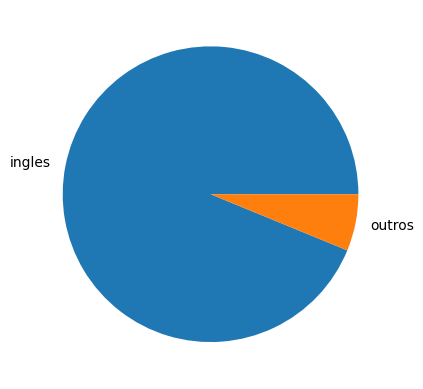

In [60]:
plt.pie(dados["total"], labels = dados["lingua"])

## 7. Visualizando a distribuição dos filmes não ingleses


<Figure size 500x1000 with 0 Axes>

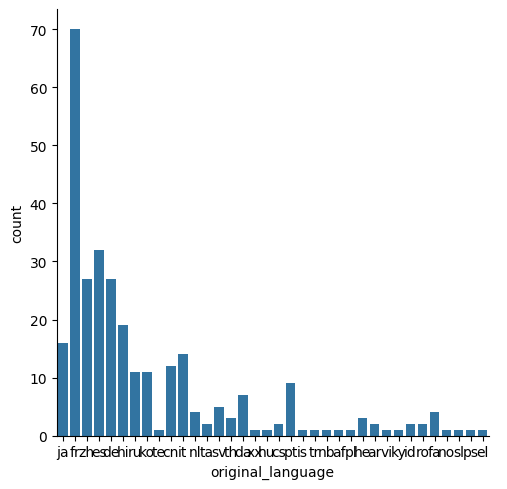

In [81]:
total_por_lingua_de_outros_fimes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_ingles = tmdb.query("original_language != 'en'")
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_ingles)

### Melhorando a visualização

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_17944\314207991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_ingles, palette = "rocket", aspect = 2, order = total_por_lingua_de_outros_fimes.index)


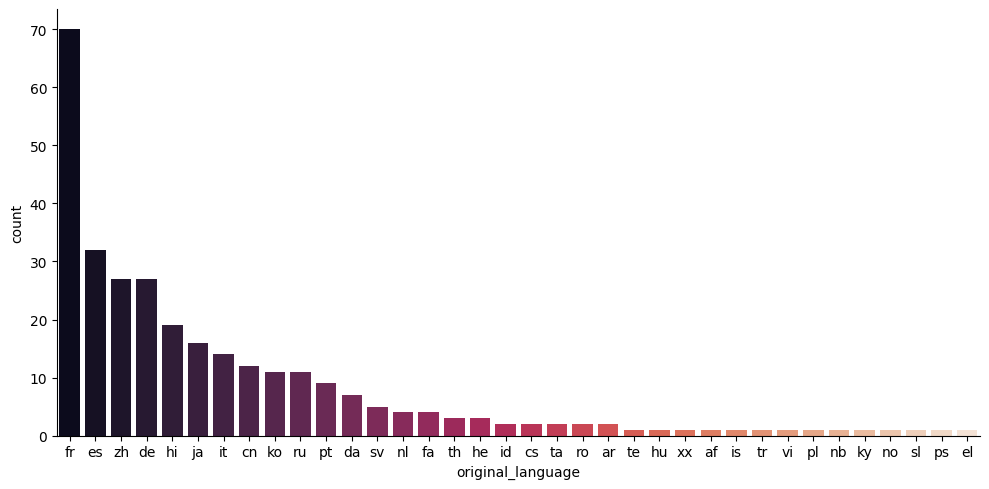

In [69]:
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_ingles, palette = "rocket", aspect = 2, order = total_por_lingua_de_outros_fimes.index)

# Conclusão

A análise realizada sobre os idiomas originais dos filmes revelou alguns padrões interessantes. Observamos que o **inglês** é, de longe, o idioma mais predominante na base de dados, com uma quantidade significativamente maior de filmes em inglês do que em outros idiomas. No entanto, apesar da predominância do inglês na indústria cinematográfica, a análise revelou uma diversidade de produções em outros idiomas, o que mostra o caráter global e multicultural do cinema. 
